# Model Training 

## We select output feature as Maths score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for tarin test and transforming data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# all algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# for score check
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# for hyperparameter 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Dataset/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Prepering X and Y veriable

In [5]:
X = df.drop(['math score'],axis=1)
y =df['math score']

In [9]:
X,y

(     gender race/ethnicity  ... reading score writing score
 0    female        group B  ...            72            74
 1    female        group C  ...            90            88
 2    female        group B  ...            95            93
 3      male        group A  ...            57            44
 4      male        group C  ...            78            75
 ..      ...            ...  ...           ...           ...
 995  female        group E  ...            99            95
 996    male        group C  ...            55            55
 997  female        group C  ...            71            65
 998  female        group D  ...            78            77
 999  female        group D  ...            86            86
 
 [1000 rows x 7 columns],
 0      72
 1      69
 2      90
 3      47
 4      76
        ..
 995    88
 996    62
 997    59
 998    68
 999    77
 Name: math score, Length: 1000, dtype: int64)

In [10]:
# columns Transfomer
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    [
        ('ohe',OneHotEncoder(drop='first'),cat_feature),
        ('scaler',StandardScaler(),num_feature)
    ]
)

In [11]:
X_transformed = preprocessor.fit_transform(X)

In [14]:
print(X_transformed)

[[ 0.          1.          0.         ...  1.          0.19399858
   0.39149181]
 [ 0.          0.          1.         ...  0.          1.42747598
   1.31326868]
 [ 0.          1.          0.         ...  1.          1.77010859
   1.64247471]
 ...
 [ 0.          0.          1.         ...  0.          0.12547206
  -0.20107904]
 [ 0.          0.          0.         ...  0.          0.60515772
   0.58901542]
 [ 0.          0.          0.         ...  1.          1.15336989
   1.18158627]]


In [16]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((700, 14), (300, 14))

### Create function that calculat all score and error

In [21]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    score = r2_score(true,predicted)
    rmse = np.sqrt(mse)
    return score,mse,mae,rmse

Model Tarining

In [22]:
models = {
    'Linear regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'K-Nearest regressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GaussianNB':GaussianNB(),
    'Support Vector Regressor':SVR(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'XGBRegressor':XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train test Model
    model_train_score, model_train_mse, model_train_mae, model_train_rmse = evaluate_model(y_train,y_train_pred)

    model_test_score, model_test_mse, model_test_mae, model_test_rmse = evaluate_model(y_test,y_test_pred)

    # print model evalution
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance on Training data")
    print('---R2 score : {:.4f}'.format(model_train_score))
    print('---Mean Squre Error : {:.4f}'.format(model_train_mse))
    print('---Mean Absolute Error : {:.4f}'.format(model_train_mae))
    print('---Root Mean Squre Error : {:.4f}'.format(model_train_rmse))

    print('----------------------------------------------------------')



    print("Model Performance on Testing data")
    print('---R2 score : {:.4f}'.format(model_test_score))
    print('---Mean Squre Error : {:.4f}'.format(model_test_mse))
    print('---Mean Absolute Error : {:.4f}'.format(model_test_mae))
    print('---Root Mean Squre Error : {:.4f}'.format(model_test_rmse))

    r2_list.append(model_test_score)

    print('='*35)
    print('\n')


Linear regression
Model Performance on Training data
---R2 score : 0.8751
---Mean Squre Error : 27.5447
---Mean Absolute Error : 4.1985
---Root Mean Squre Error : 5.2483
----------------------------------------------------------
Model Performance on Testing data
---R2 score : 0.8759
---Mean Squre Error : 30.8866
---Mean Absolute Error : 4.4183
---Root Mean Squre Error : 5.5576


Lasso
Model Performance on Training data
---R2 score : 0.8078
---Mean Squre Error : 42.3875
---Mean Absolute Error : 5.1582
---Root Mean Squre Error : 6.5106
----------------------------------------------------------
Model Performance on Testing data
---R2 score : 0.8103
---Mean Squre Error : 47.2041
---Mean Absolute Error : 5.3929
---Root Mean Squre Error : 6.8705


Ridge
Model Performance on Training data
---R2 score : 0.8751
---Mean Squre Error : 27.5506
---Mean Absolute Error : 4.1979
---Root Mean Squre Error : 5.2489
----------------------------------------------------------
Model Performance on Testing da

## Result

In [23]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name','Model R2 Score']).sort_values(by=['Model R2 Score'],ascending=False)

,Model Name,Model R2 Score
0,Linear regression,0.875863
2,Ridge,0.875752
10,GradientBoostingRegressor,0.863756
8,RandomForestRegressor,0.847233
9,AdaBoostRegressor,0.839132
11,XGBRegressor,0.820321
1,Lasso,0.810281
4,K-Nearest regressor,0.774519
5,DecisionTreeRegressor,0.737578
7,Support Vector Regressor,0.713624


## We got a linear regression model as best accuracy
lets pick that model

In [25]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [26]:
y_pred

array([ 76.511652  ,  58.89818013,  76.93847803,  76.96588112,
        87.63315155,  78.94668281,  64.60780093,  52.83011773,
        74.28323561,  48.94737113,  53.03440427,  36.20260815,
        67.86648609,  52.27420197,  86.79820118,  70.59883397,
        51.63855945,  46.80113844,  48.61883998,  52.72027293,
        73.89225713,  39.34102125,  57.79189897,  36.36055882,
        78.23627285,  81.63804754,  75.56062537,  46.17327085,
        31.44417895,  49.87212984,  65.58902229,  70.43151729,
        60.32667234,  83.48021561,  84.19623167,  45.82817241,
        76.05073377,  70.13652865,  65.96552567,   3.70880223,
        78.7290069 ,  67.01073937,  68.10392776,  60.49543662,
        79.65561335,  67.5109834 ,  72.06518844,  24.61823419,
        85.9787203 ,  70.49150482,  75.2833751 ,  66.72723882,
        81.4116524 ,  45.6531272 ,  66.11043199,  67.24766513,
        86.09186   ,  58.67846468,  81.91498574,  81.65594974,
        47.45253577,  72.39386125,  70.73746771,  55.70

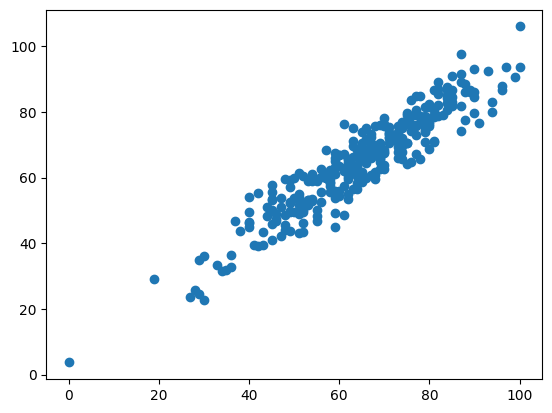

In [27]:
# plot the data
plt.scatter(y_test,y_pred)
plt.show()

<Axes: xlabel='math score'>

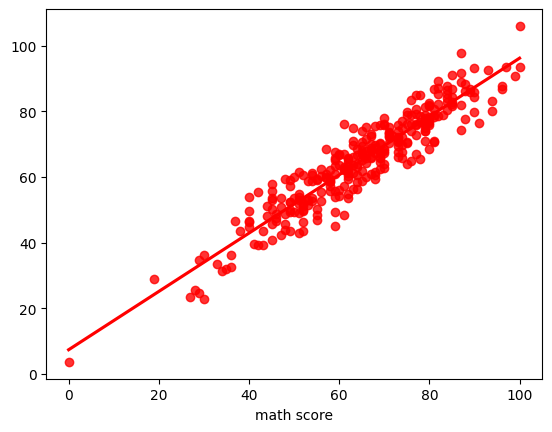

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')